## Metric #2: Cemeteries - Julianne



More cemeteries could probably be linked to more ghosts, so we decided to use this to gage the best neighborhood for the Ghostbusters.  
I looked at the area of the cemetery per neighborhood.

In [ ]:
import matplotlib.pyplot as plt
import geopandas
import pandas as pd
%matplotlib inline

So first let's look at the cemetery data. It shows all the cemeteries in Allegheny County, and their areas.

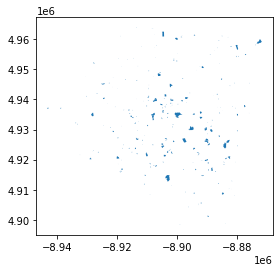

In [2]:
cemetery = geopandas.read_file('Cemeteries.shp') # read in the shapefile
cemetery.plot() # plot the geopandas dataframe

In [3]:
cemetery.head()

,FID,PERIMETER,NAME,ACRES,SHAPE_Leng,SHAPE_Area,geometry
0,1,1146.338989,Mount Pleasant Cemetery,1.826,460.873252,12858.283095,"POLYGON ((-8913536.939 4963852.907, -8913530.6..."
1,2,426.527710,Reservoir Cemetery In Pine Twp,0.276,171.523029,1946.327588,"POLYGON ((-8908720.890 4963641.147, -8908722.0..."
2,3,1135.046021,West Union Cemetery,1.571,456.342863,11065.559710,"POLYGON ((-8908127.774 4963656.607, -8908058.9..."
3,4,11221.629883,Holy Savior Catholic Cemetery,125.665,4514.258494,884589.543348,"POLYGON ((-8904408.952 4962512.672, -8904377.5..."
4,5,597.789673,Clover Lane Cemetery,0.455,240.490123,3204.759739,"POLYGON ((-8907459.908 4961571.845, -8907455.1..."


This doesn't show us that much, but if we can use it in relation to another map, maybe we can gain more information.  
Sadly the cemetery data doesn't help us much. We only have the acres, perimeter, name and shape information.  

After trying to merge the neighborhood and cemetery files, I discovered they use different coordinate systems to create their maps, so I can't work with them together just yet. So I had to find another file to use.

I found a database of all the blocks in in Southwestern PA. It uses the same coordinate system as the cemetery data, so we could work with these two combined. But first we should narrow down the map to the right area. 

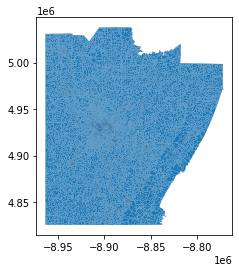

In [4]:
block = geopandas.read_file('blockcodes/BlockCodes2016.shp')
block.plot()

In [5]:
block.head(1)

,OBJECTID_1,OBJECTID_2,OBJECTID,STATEFP10,COUNTYFP10,TRACTCE10,BLOCKCE10,GEOID10,NAME10,MTFCC10,...,Pgh_CityCo,Pgh_Police,Pgh_FireDi,Pgh_DPW_Di,Pgh_Ward,Distance,Shape_Leng,Shape_Le_1,Shape_Area,geometry
0,1,1,440,42,003,516100,1000,420035161001000,Block 1000,G5040,...,0,0,None,0,0,0.0,0.006539,935.966032,7786.056875,"POLYGON ((-8892863.053 4929630.006, -8892857.5..."


The block file has multiple location ids and a GEOID which the neighborhood file also has, so we will focus on tractce10 and geoid10 columns to narrow down the file.  
The tractce is the most specific part of the geoid, so that will be most important.


In [33]:
neighbor = geopandas.read_file('Neighborhoods_.shp')
neighbor.head(1)

,objectid,fid_blockg,statefp10,countyfp10,tractce10,blkgrpce10,geoid10,namelsad10,mtfcc10,funcstat10,...,shape_ar_1,page_numbe,plannerass,created_us,created_da,last_edite,last_edi_1,Shape__Are,Shape__Len,geometry
0,1,0.0,42,003,040500,1,420030405001,Block Group 1,G5030,S,...,7.843108e+06,15,Derek Dauphin,pgh.admin,2019-10-23T14:17:16.403Z,pgh.admin,2019-10-23T14:17:16.403Z,7.842997e+06,11525.904546,"POLYGON ((-79.95304 40.44203, -79.95302 40.442..."


In [34]:
block['GEOID10'] = block['GEOID10'].astype(int)
querymask = block['GEOID10']<420040000000000
                 #420035161001000
    

All the geoids in Pittsburgh Neighborhoods and Allegheny County are less than 420040000000000, so I filtered out the blocks that weren't in a geoid less than that

In [35]:
block_filtered = block[querymask]
block_filtered.head(3)

,OBJECTID_1,OBJECTID_2,OBJECTID,STATEFP10,COUNTYFP10,TRACTCE10,BLOCKCE10,GEOID10,NAME10,MTFCC10,...,Pgh_CityCo,Pgh_Police,Pgh_FireDi,Pgh_DPW_Di,Pgh_Ward,Distance,Shape_Leng,Shape_Le_1,Shape_Area,geometry
0,1,1,440,42,003,516100,1000,420035161001000,Block 1000,G5040,...,0,0,None,0,0,0.0,0.006539,935.966032,7786.056875,"POLYGON ((-8892863.053 4929630.006, -8892857.5..."
1,2,2,439,42,003,516100,1007,420035161001007,Block 1007,G5040,...,0,0,None,0,0,0.0,0.002721,348.917436,6992.354496,"POLYGON ((-8893440.022 4929354.169, -8893436.3..."
2,3,3,434,42,003,510000,1025,420035100001025,Block 1025,G5040,...,0,0,None,0,0,0.0,0.003951,518.625510,6620.278364,"POLYGON ((-8887324.797 4923905.993, -8887337.2..."


So now the map is just of Allegheny County

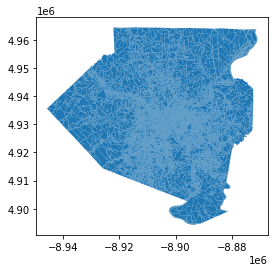

In [36]:
block_filtered.plot()

We can now use the tractce10. That is the most specific part of a geoid, so we could compare the ones in the neighborhood files to the ones in the block file. 

In [10]:
query = block_filtered['TRACTCE10'].astype(str).isin(neighbor['tractce10'].astype(str))
block_neighbor = block_filtered[query]
block_neighbor.head(3)

,OBJECTID_1,OBJECTID_2,OBJECTID,STATEFP10,COUNTYFP10,TRACTCE10,BLOCKCE10,GEOID10,NAME10,MTFCC10,...,Pgh_CityCo,Pgh_Police,Pgh_FireDi,Pgh_DPW_Di,Pgh_Ward,Distance,Shape_Leng,Shape_Le_1,Shape_Area,geometry
1287,1288,1288,1078,42,003,980000,1001,420039800001001,Block 1001,G5040,...,9,5,3-24,2,12,0.0,0.037120,4538.058360,595181.997811,"POLYGON ((-8892712.994 4937519.801, -8892712.8..."
1288,1289,1289,1491,42,003,130600,3032,420031306003032,Block 3032,G5040,...,9,5,3-19,2,13,0.0,0.000673,83.498815,513.556277,"POLYGON ((-8890962.050 4932351.060, -8890962.9..."
1295,1296,1296,1391,42,003,130200,2005,420031302002005,Block 2005,G5040,...,9,5,3-18,2,13,0.0,0.005534,653.441154,13332.367854,"POLYGON ((-8893908.566 4932994.937, -8893959.3..."


This is pretty good, we have all the blocks in the same region as the neighborhoods. But they are still separated as blocks, we need the regions to be connected as one area.   
We can use dissolve to do this.

In [37]:
block_ids = block_neighbor[['OBJECTID_1','TRACTCE10', 'Shape_Leng','Shape_Le_1','Shape_Area', 'geometry']]
tractce = block_ids.dissolve(by = 'TRACTCE10')
tractce['id'] = tractce.index
tractce.head()

,geometry,OBJECTID_1,Shape_Leng,Shape_Le_1,Shape_Area,id
TRACTCE10,,,,,,
010300,"POLYGON ((-8903238.252 4929184.224, -8903365.2...",1345,0.011448,1373.313708,83814.842782,010300
020100,"POLYGON ((-8905333.730 4929073.221, -8905344.5...",1356,0.003588,454.870832,12873.154790,020100
020300,"POLYGON ((-8904478.017 4930768.392, -8904489.5...",1464,0.004321,537.395626,11911.087429,020300
030500,"POLYGON ((-8902910.750 4929926.328, -8902922.3...",1902,0.003024,390.821464,6205.349478,030500
040200,"POLYGON ((-8901884.718 4929570.626, -8901959.3...",1350,0.007286,948.691413,31482.405181,040200


Below is the connected regions compared to the regions in the neighborhood file.

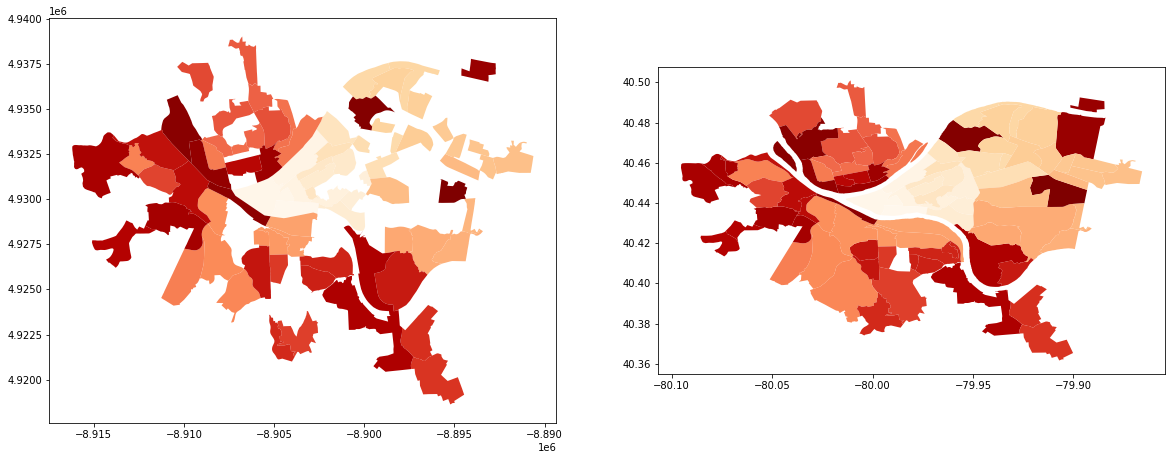

In [60]:

fig, axes = plt.subplots(figsize = (20,20), ncols=2)

tractce.plot(ax = axes[0], column = 'id', cmap = 'OrRd')

neighbor.plot(ax = axes[1], column = 'tractce10', cmap = 'OrRd')

That that we have the region of Pittsburgh, lets look at the cemeteries in this area.

(4918624.017720282, 4939020.98838301)

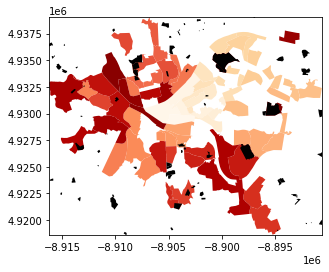

In [13]:
ax = tractce.plot(column = 'id',cmap = 'OrRd')

cemetery.plot(ax=ax, color = 'black')

minx, miny, maxx, maxy = tractce.total_bounds
ax.set_xlim(minx, maxx)
ax.set_ylim(miny, maxy)

Now that these maps line up, we can find the area of each cemetery in each region using 'intersection'. This allows us to see where the cemeteries intersect the regions, and add up the area of that intersection.

In [43]:
tractce['cem_area'] = 0
for row_neighbor in tractce.iterrows():
    for row_cem in cemetery.iterrows():
        intersection = row_neighbor[1]['geometry'].intersection(row_cem[1]['geometry'])
        if(intersection.area)> 0:
            row_id = row_neighbor[1].loc['id']
            tractce.loc[row_id,'cem_area'] += intersection.area

We can now map pittsburgh by cemetery area!

Text(0.5, 1.0, 'Cemetary Area per tractce Region')

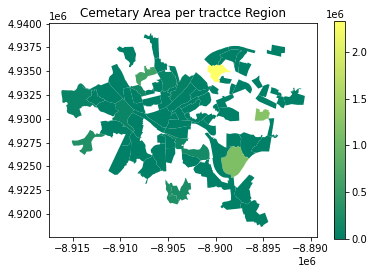

In [45]:
tractce.plot(column = 'cem_area', cmap = 'summer', legend = True)
plt.title('Cemetary Area per tractce Region')

However we have to remember that this is by REGION in the tractce numbers, not by neighborhood. So we need to narrow it down to neighborhood.  
Lets look at all the areas that have a cemetery area grater than 0

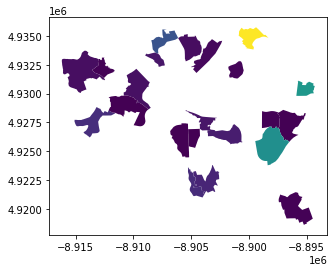

In [16]:
mask = tractce['cem_area']>0
tractce_big = tractce[mask]
tractce_big.plot(column = 'cem_area')

We can compare this to all the areas that correspond on the neighborhood map. I filtered all the neighborhoods that have the same tractce numbers

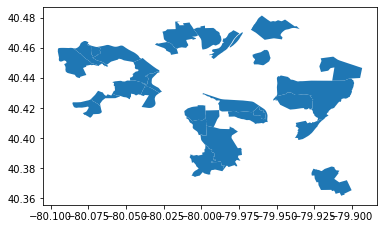

In [46]:
query = neighbor['tractce10'].isin(tractce_big['id'])
neighbor_big = neighbor[query]
neighbor_big.plot()

We can now compare the two and find which neighborhoods actually have the cemeteries in them. 

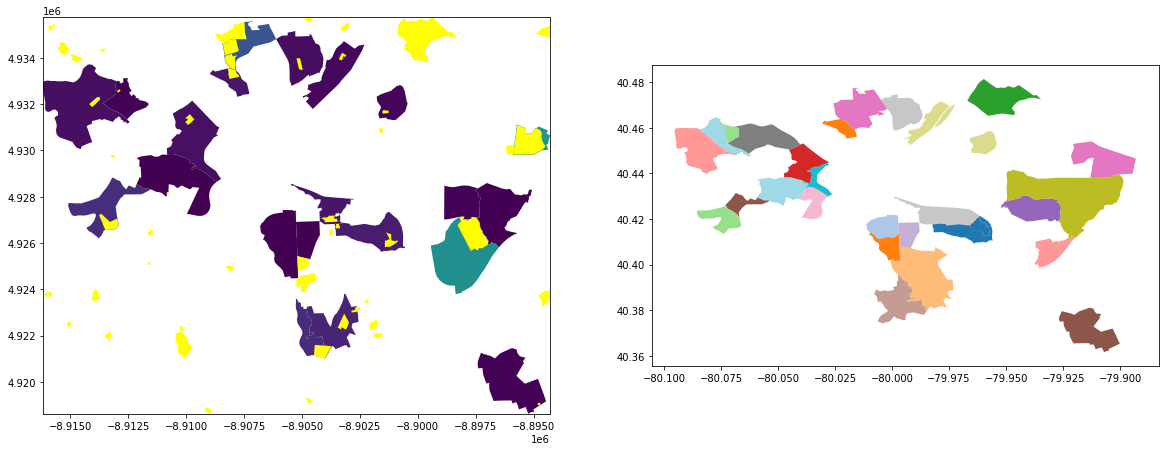

In [87]:
fig, axes = plt.subplots(figsize = (20,20), ncols=2)

ax = tractce_big.plot(ax = axes[0], figsize = (10,10), column = 'cem_area')
cemetery.plot(ax = ax, color = 'yellow')

minx, miny, maxx, maxy = tractce_big.total_bounds
ax.set_xlim(minx, maxx)
ax.set_ylim(miny, maxy)

plot = neighbor_big.plot(ax = axes[1], figsize = (10,10), column = 'hood', cmap = 'tab20')

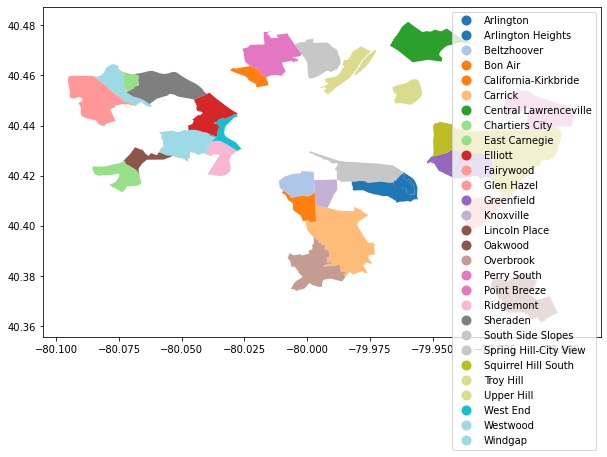

In [86]:
plot = neighbor_big.plot( figsize = (10,10), column = 'hood', cmap = 'tab20', label = 'hood', legend = True)

When we compare these maps, we can see that some regions are comprised of two neighborhood. I just manually checked whether the cemeteries (the yellow splotches) would appear in both neighborhood or only one in the tractce region.  
I made note of the neighborhoods that had no cemeteries in them, and removed those neighborhoods from the group.

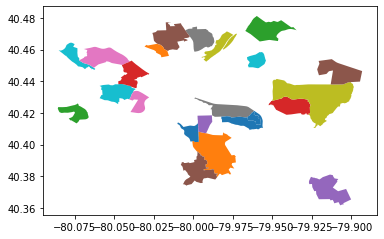

In [23]:
remove = ['Fairywood', 'Glen Hazel', 'Beltzhoover', 'Oakwood', 'Chartiers City', 'West End']
neighbor_filter = neighbor_big[~neighbor_big['hood'].isin(remove)]
neighbor_filter.plot(column = 'hood')

So now we have all the neighborhoods, that contain cemeteries. Now we need to merge these names with their areas. 

In [24]:
neighbor_filter['cem_area'] = 0
for row_neighbor in neighbor_filter.iterrows():
    for row_cem in tractce_big.iterrows():
        if(int(row_neighbor[1].loc['tractce10'])==int(row_cem[1].loc['id'])):
            area = row_cem[1].loc['cem_area']
            tractce = row_neighbor[1].loc['tractce10']
            row_id = neighbor_filter.loc[neighbor_filter['tractce10'] == tractce].index
            neighbor_filter.loc[row_id, 'cem_area'] = area

/opt/tljh/user/lib/python3.8/site-packages/geopandas/geodataframe.py:831: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)


This code matches the tractce in the top neighborhoods to the tractce in the region/cemetery data.  
If their tractce matches, then we can add the cemetery area to that neighborhood. 

I now wanted to make a dataframe that has only the neighborhood name to the cemetery area.   
I added all the hood names to the dataframe, and then the ones that matched the neighbor_filter database got their area, the ones that didn't are the ones that had no cemeteries, so their area became zero.

In [25]:
neighbor_area = pd.DataFrame(columns = ['hood', 'cem_area'])
neighbor_area['hood'] = neighbor['hood']
#neighbor_area['tractce'] = neighbor['tractce10']
neighbor_area['cem_area'] = 0
for row_filter in neighbor_filter.iterrows():
    for row_hood in neighbor_area.iterrows():
        if(row_hood[1].loc['hood']==row_filter[1].loc['hood']):
            area = row_filter[1].loc['cem_area']
            hood = row_hood[1].loc['hood']
            row_id = neighbor_area.loc[neighbor_area['hood'] == hood].index
            neighbor_area.loc[row_id, 'cem_area'] = area

Here is what the dataframe looks like.

In [26]:
neighbor_area.head()

,hood,cem_area
0,Central Oakland,0.0
1,North Oakland,0.0
2,West Oakland,0.0
3,Crawford-Roberts,0.0
4,Strip District,0.0


I then merged the neighborhood and neighbor_area data based on the hood names.

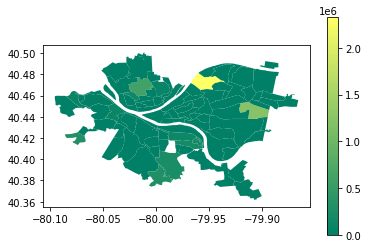

In [31]:
cem_area_map = neighbor.merge(neighbor_area, how='left', left_on='hood', right_on='hood')
cem_area_map.plot(column = 'cem_area', cmap = 'summer', legend = True)

Now we have a nice plot of all the neighborhoods and their cemetery area!

I wanted to show this as a bar graph as well...

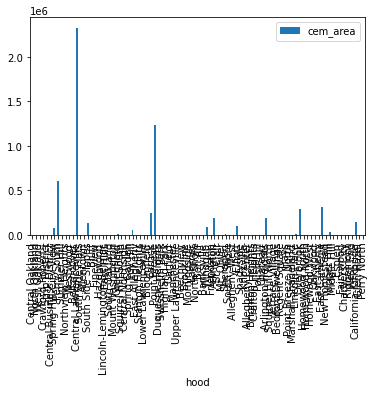

In [53]:
neighbor_area.plot.bar(rot = 90, x = 'hood')

In [65]:
neighbor_area_sorted = neighbor_area.sort_values('cem_area')

That bar graph looks a little messy, so I filtered it down to the top neighborhoods, and made it horizontal.

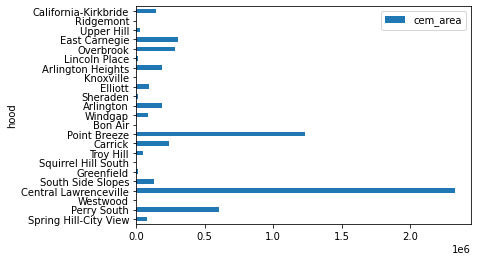

In [66]:
neighbor_area_top = neighbor_area[neighbor_area['cem_area']>0]
neighbor_area_top.plot.barh(x= 'hood')

So for cemeteries, Central Lawrenceville has the highest area, with Point Breeze coming in second, and Perry South in third.